In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [3]:
sequence=np.array([i for i in range(1,101)])
window_size=3
X=[]
Y=[]

In [4]:
for i in range(len(sequence)-window_size):
    X.append(sequence[i:i+window_size])
    Y.append(sequence[i+window_size])


In [5]:
X=np.array(X)
Y=np.array(Y)

In [6]:
X=X.reshape((X.shape[0],X.shape[1],1))

In [7]:
model=Sequential()
model.add(SimpleRNN(units=32,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.fit(X,Y,epochs=50,verbose=2)
print("training complete")

Epoch 1/50
4/4 - 0s - 11ms/step - loss: 0.7047
Epoch 2/50
4/4 - 0s - 14ms/step - loss: 0.7046
Epoch 3/50
4/4 - 0s - 14ms/step - loss: 0.7034
Epoch 4/50
4/4 - 0s - 15ms/step - loss: 0.7036
Epoch 5/50
4/4 - 0s - 13ms/step - loss: 0.7037
Epoch 6/50
4/4 - 0s - 10ms/step - loss: 0.7029
Epoch 7/50
4/4 - 0s - 15ms/step - loss: 0.7027
Epoch 8/50
4/4 - 0s - 12ms/step - loss: 0.7016
Epoch 9/50
4/4 - 0s - 16ms/step - loss: 0.6969
Epoch 10/50
4/4 - 0s - 13ms/step - loss: 0.6937
Epoch 11/50
4/4 - 0s - 11ms/step - loss: 0.6908
Epoch 12/50
4/4 - 0s - 17ms/step - loss: 0.6899
Epoch 13/50
4/4 - 0s - 13ms/step - loss: 0.6917
Epoch 14/50
4/4 - 0s - 10ms/step - loss: 0.6953
Epoch 15/50
4/4 - 0s - 14ms/step - loss: 0.6965
Epoch 16/50
4/4 - 0s - 15ms/step - loss: 0.6979
Epoch 17/50
4/4 - 0s - 15ms/step - loss: 0.6978
Epoch 18/50
4/4 - 0s - 9ms/step - loss: 0.6957
Epoch 19/50
4/4 - 0s - 15ms/step - loss: 0.6881
Epoch 20/50
4/4 - 0s - 15ms/step - loss: 0.6796
Epoch 21/50
4/4 - 0s - 10ms/step - loss: 0.6756
Ep

In [9]:
test_input=np.array([8,9,10])
test_input=test_input.reshape((1,window_size,1))
predicted=model.predict(test_input,verbose=0)
print(f"predicted next number:{predicted[0][0]:.2f}")

predicted next number:9.30


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


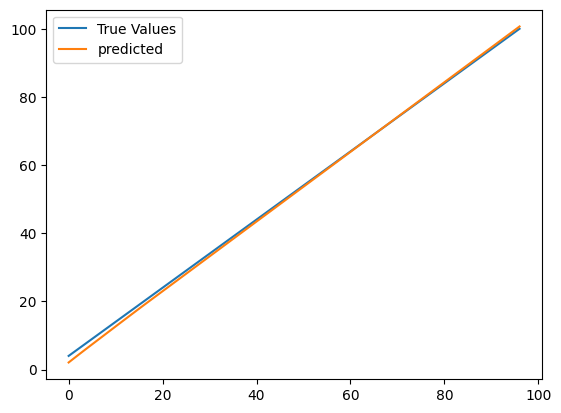

In [12]:
predictions=model.predict(X)
plt.plot(Y,label='True Values')
plt.plot(predictions,label='predicted')
plt.legend()
plt.show()